## Chartres signatures / fingerprints / empreintes

Use FDA (SETAC_Article2_figures.ipynb for reference) to define fingerprints.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data_directory = r'D:\VP\ARTICLE2\Terrain\ToxEvents_TOF825'
Tox = 825
TXM = 'TOF{}'.format(Tox)

### Data Requirement

Data must include a file for Erpobdella, Gammarus and Radix.

No obligation to change to working directory.

In [3]:
#include all csv files in length
datareg = {'E':[],'G':[],'R':[]}
datafiles = [r'{}\{}'.format(data_directory,f) for f in os.listdir(data_directory) if '.csv' in f]
for f in datafiles:
    if 'E-' in f:
        datareg['E'].append(f)
    elif 'G-' in f:
        datareg['G'].append(f)
    else:
        datareg['R'].append(f)
        
print('Erpobdella # of entries: {}'.format(len(datareg['E'])))
print('Gammarus # of entries: {}'.format(len(datareg['G'])))
print('Radix # of entries: {}'.format(len(datareg['R'])))

Erpobdella # of entries: 68
Gammarus # of entries: 68
Radix # of entries: 68


In [4]:
#example of string format
print(datareg['E'][0])

D:\VP\ARTICLE2\Terrain\ToxEvents_TOF825\E-202207231142.csv


### Data Form

List datestrings and datetimes for each even beginning

In [5]:
datestrings = [date.split('\\')[-1].split('-')[-1].split('.')[0] for date in datareg[[*datareg][0]]]
datetimes = [datetime.datetime.strptime(date,'%Y%m%d%H%M') for date in datestrings]
datetimes[:3]

[datetime.datetime(2022, 7, 23, 11, 42),
 datetime.datetime(2022, 7, 24, 7, 26),
 datetime.datetime(2022, 7, 25, 6, 34)]

In [6]:
data = {}
species = {'E':'Erpobdella','G':'Gammarus','R':'Radix'}
timeunit = 's'
timescalar = {'s':60,'m':1}
timestep = timescalar[timeunit]

for s in species:
    data.update({s:pd.DataFrame(index = np.arange(-(30*timestep),330*timestep + 1,2*timestep),columns = datestrings)})

no_datapoints = 6*30
no_deleted = 0
na_limit = no_datapoints//20

for event in datestrings:
    for s in [*species]:
        file = r'{}\{}-{}.csv'.format(data_directory,s,event)
        df = pd.read_csv(file,index_col = 0,header = None)
        if df[1].isna().sum() > na_limit:
            break
        else:
            df = df.interpolate(method = 'linear',limit_direction = 'both') #interpolate to fill na

        data[s][event].iloc[:len(np.array(df[1]))] = np.array(df[1])
        
#remove columns with nans
for event in datestrings:
    if data[[*data][0]][event].isna().any():
        for s in [*species]: data[s] = data[s].drop(event, axis = 1)
        no_deleted += 1
            
print('Number of events retained after data cleaning: {}'.format(data[[*data][0]].shape[1]))
print('Number of rejected events: {} - (total NaNs > {})'.format(no_deleted,na_limit))

Number of events retained after data cleaning: 64
Number of rejected events: 4 - (total NaNs > 9)


### Data Requirement

The IGT terrain calculation adds noise / bruit de fond. (True IGT for values < sqrt(10) are zero)

**This should be removed for Signature Definition.**

Normalisation should not be necessary in this case, as it is already between 0-100. The study should be repeated for IGT brut/RAW.

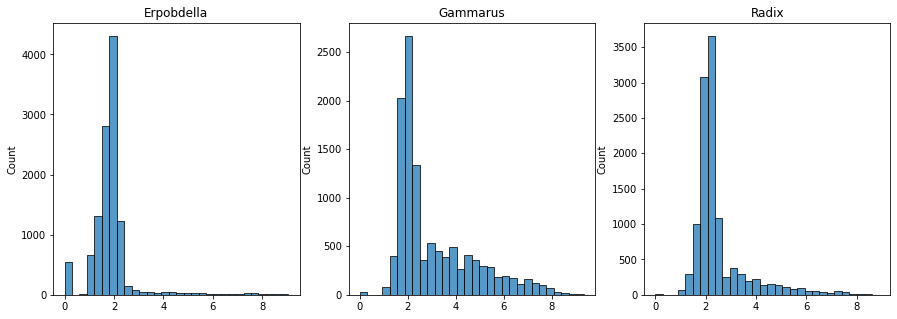

In [7]:
fig_hist,ax_hist = plt.subplots(1,3,figsize = (15,5))
for i,s in enumerate([*species]):
    sns.histplot(np.array(data[s]).flatten(),bins = 30, ax = ax_hist[i])
    ax_hist[i].set_title(species[s])

Note this shows that most events are due to Gammarus or Radix reaction.
Almost no events occur for Erpobdella - only low values.

# FDA

### Data Pretreatment

Begin smoothing for individual events (select three events randomly)

In [9]:
data['E'].head()

,202207231142,202207240726,202207261302,202207311008,202207312342,202208010834,202208012048,202208141926,202208191924,202208200948,...,202211141822,202211150144,202211151100,202211170542,202211180646,202211191200,202211251920,202211280608,202212010740,202212011858
-1800,2.0,1.732051,1.414214,2.236068,1.414214,3.464102,1.414214,1.414214,1.414214,1.732051,...,2.0,2.0,2.0,2.0,3.0,2.0,1.732051,1.732051,1.414214,1.732051
-1680,2.0,1.732051,1.414214,2.236068,1.414214,4.0,1.414214,0.0,2.236068,1.414214,...,2.0,2.0,2.236068,2.0,1.732051,1.732051,1.414214,2.0,1.0,1.414214
-1560,2.236068,2.236068,1.732051,1.732051,1.414214,7.416198,2.0,0.0,2.0,1.732051,...,2.0,3.605551,2.0,2.0,2.0,1.732051,1.732051,1.732051,1.414214,1.414214
-1440,1.732051,2.0,1.732051,1.732051,1.0,2.0,2.0,1.0,2.0,1.414214,...,1.732051,2.236068,2.0,1.414214,2.0,1.732051,1.414214,1.732051,0.0,1.414214
-1320,1.414214,2.0,2.0,2.0,1.414214,5.291503,2.828427,0.0,2.0,2.236068,...,1.732051,2.645751,2.236068,2.0,3.162278,2.0,1.414214,1.414214,0.0,1.0


In [44]:
#visualise events for smoothing randomly
cols = data['E'].columns[np.random.randint(60,size = 6)]

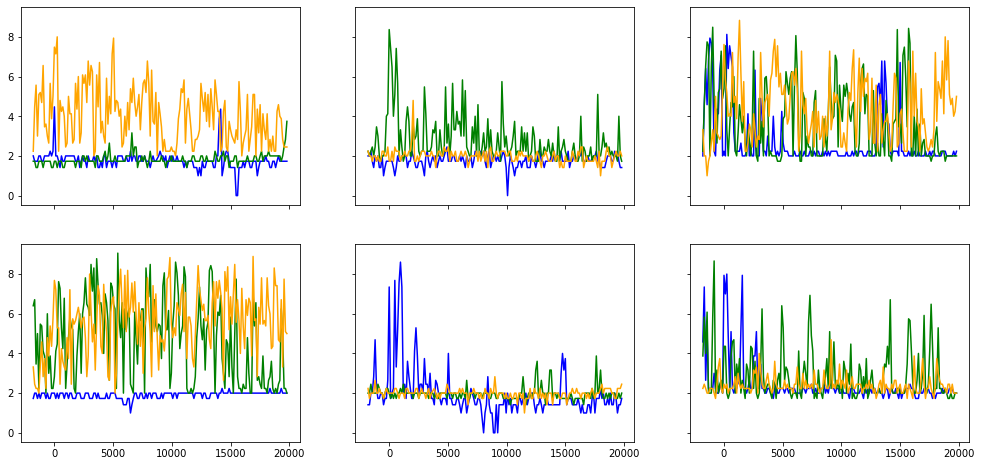

In [45]:
fig_ev,axe_ev = plt.subplots(2,3,figsize = (17,8),sharex = True,sharey = True)
for i,col in enumerate(cols):
    axe_ev[i//3,i%3].plot(data['E'][col],color = 'blue')
    axe_ev[i//3,i%3].plot(data['G'][col],color = 'green')
    axe_ev[i//3,i%3].plot(data['R'][col],color = 'orange')

## Smoothing

Smoothing bandwith chosen as 5 to avoid over filtering
Could also be chosen as 2 before taking breakpoints and performing BSpline smoothing
Or chould use point identification (important points)

In [30]:
import skfda
from skfda.misc.hat_matrix import (
    NadarayaWatsonHatMatrix,
)
from skfda.misc.kernels import uniform
from skfda.preprocessing.smoothing import KernelSmoother
from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch
from skfda.representation.grid import FDataGrid

In [31]:
species

{'E': 'Erpobdella', 'G': 'Gammarus', 'R': 'Radix'}

In [49]:
#convert data to FDataGrids
Fdata = {}
for s in [*species]:
    IGT_data_matrix = [np.around(np.array(data[s][col],dtype = np.float64),decimals = 3) for col in cols]
    IGT_grid_points = [i for i in range(data[s].shape[0])]
    IGT_fd = FDataGrid(IGT_data_matrix,IGT_grid_points,
                       dataset_name = 'IGT{}'.format(species[s]),
                       argument_names = ('time',),
                       coordinate_names = ('IGT',)
                       )
    Fdata.update({s:IGT_fd})

In [50]:
for s in Fdata:
    Fdata[s] = KernelSmoother(
        kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 5),
    ).fit_transform(Fdata[s])

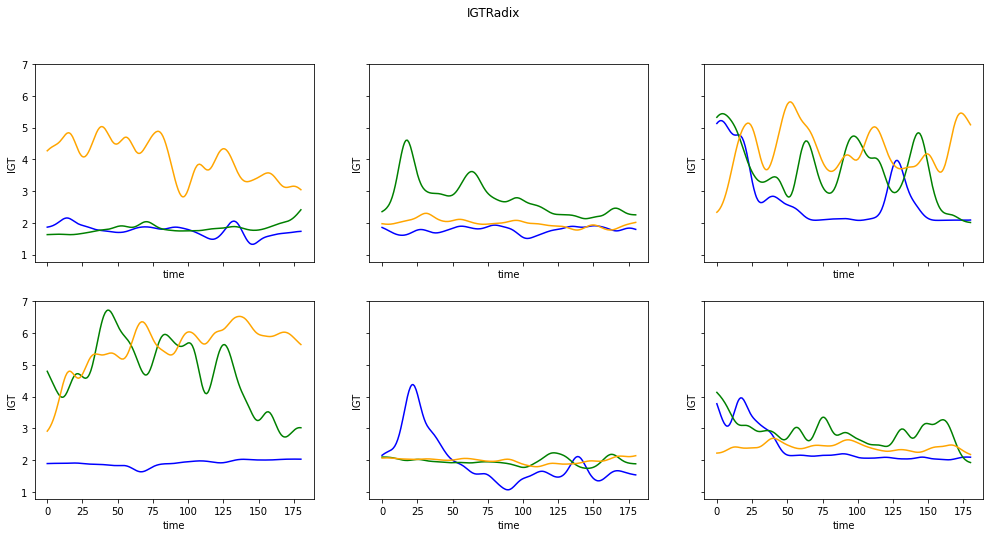

In [51]:
fig_ev_sm,ax_ev_sm = plt.subplots(2,3,figsize = (17,8),sharex = True,sharey = True)
for i in range(6):
    Fdata['E'][i].plot(ax_ev_sm[i//3,i%3],color = 'blue')
    Fdata['G'][i].plot(ax_ev_sm[i//3,i%3],color = 'green')
    Fdata['R'][i].plot(ax_ev_sm[i//3,i%3],color = 'orange')

## Multidimensional data

Joining of data using smoothing sigmoid with small joinging window

In [63]:
def sigmoid_filter(y1,y2,breakpoint,bandwidth):
    x = np.arange(len(y1))
    sigma = 1.0 / (1 + np.exp(-(x - breakpoint) / bandwidth))
    f = (1-sigma) * y1 + sigma * y2
    return f

def join_series(series):
    """
    Assumed series = {'E':np.mean(E),'G':np.mean(G),'R':np.mean(R)}
    """
    y1,y2 = np.zeros(len(series['E']) + len(series['G'])),np.zeros(len(series['E']) + len(series['G']))
    y1[:len(series['E'])] = series['E']
    y2[len(series['E']):] = series['G']
    y_concat = sigmoid_filter(y1,y2,len(series['E']),5)
    
    y1,y2 = np.zeros(len(y_concat) + len(series['R'])),np.zeros(len(y_concat) + len(series['R']))
    y1[:len(y_concat)] = y_concat
    y2[len(y_concat):] = series['R']
    y_concat = sigmoid_filter(y1,y2,len(y_concat),5)
    
    return y_concat

In [77]:
df_full = pd.DataFrame(index = np.arange(3*data['E'].shape[0]),columns = data['E'].columns)
for col in data[[*data][0]].columns:
    df_full[col] = join_series({s:data[s][col] for s in [*species]})
    
df_full.head()

,202207231142,202207240726,202207261302,202207311008,202207312342,202208010834,202208012048,202208141926,202208191924,202208200948,...,202211141822,202211150144,202211151100,202211170542,202211180646,202211191200,202211251920,202211280608,202212010740,202212011858
0,2.000000,1.732051,1.414214,2.236068,1.414214,3.464102,1.414214,1.414214,1.414214,1.732051,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.732051,1.732051,1.414214,1.732051
1,2.000000,1.732051,1.414214,2.236068,1.414214,4.000000,1.414214,0.000000,2.236068,1.414214,...,2.000000,2.000000,2.236068,2.000000,1.732051,1.732051,1.414214,2.000000,1.000000,1.414214
2,2.236068,2.236068,1.732051,1.732051,1.414214,7.416198,2.000000,0.000000,2.000000,1.732051,...,2.000000,3.605551,2.000000,2.000000,2.000000,1.732051,1.732051,1.732051,1.414214,1.414214
3,1.732051,2.000000,1.732051,1.732051,1.000000,2.000000,2.000000,1.000000,2.000000,1.414214,...,1.732051,2.236068,2.000000,1.414214,2.000000,1.732051,1.414214,1.732051,0.000000,1.414214
4,1.414214,2.000000,2.000000,2.000000,1.414214,5.291503,2.828427,0.000000,2.000000,2.236068,...,1.732051,2.645751,2.236068,2.000000,3.162278,2.000000,1.414214,1.414214,0.000000,1.000000


In [86]:
#convert to functional data
IGT_data_matrix = [np.around(np.array(df_full[col],dtype = np.float64),decimals = 3) for col in df_full.columns]
IGT_grid_points = [i for i in range(df_full.shape[0])]
IGT_fd = FDataGrid(IGT_data_matrix,IGT_grid_points,
                   dataset_name = 'IGTfull',
                   argument_names = ('time',),
                   coordinate_names = ('IGT',)
                   )

#smooth functional data
Fdata_full = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 5),
).fit_transform(IGT_fd)

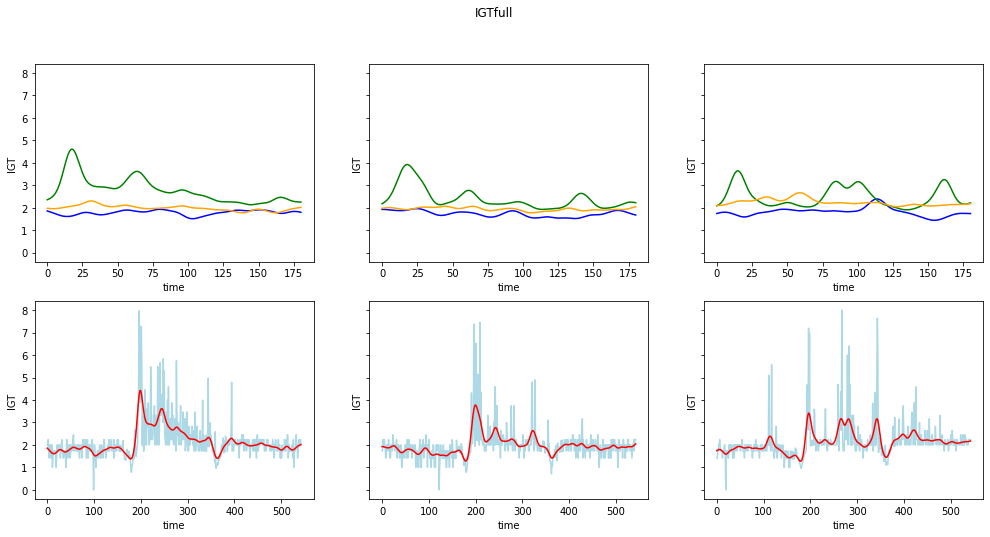

In [91]:
#visualise smoothing
fig_ev_MD,ax_ev_MD = plt.subplots(2,3,figsize = (17,8),sharex = False,sharey = True)
for i in range(3):
    Fdata['E'][i].plot(ax_ev_MD[0,i],color = 'blue')
    Fdata['G'][i].plot(ax_ev_MD[0,i],color = 'green')
    Fdata['R'][i].plot(ax_ev_MD[0,i],color = 'orange')
    ax_ev_MD[1,i].plot(df_full[df_full.columns[i]],color = 'lightblue')
    Fdata_full[i].plot(ax_ev_MD[1,i],color = 'red')

# Functional Data Analysis

Bring in FDA to visualise data entries

In [92]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
)

(array([-0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ]),
 [Text(0, -0.1, '−0.10'),
  Text(0, -0.05, '−0.05'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.05000000000000002, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15, '0.15'),
  Text(0, 0.20000000000000004, '0.20')])

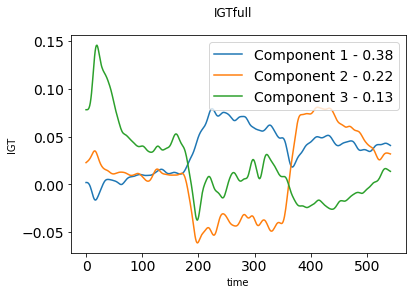

In [94]:
fpca_discretized = FPCA(n_components=3)
fpca_discretized.fit(Fdata_full)
fpca_discretized.components_.plot()
plt.legend(labels=[
    'Component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),
    'Component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1]),
    'Component 3 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[2])
],fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

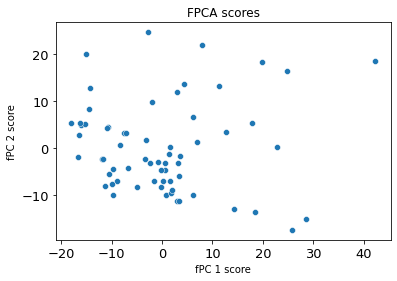

In [95]:
scores = fpca_discretized.fit_transform(Fdata_full)

fig_FPCA,ax_FPCA = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],ax = ax_FPCA)
ax_FPCA.set_xlabel("fPC 1 score")
ax_FPCA.set_ylabel("fPC 2 score")
ax_FPCA.set_title("FPCA scores")

ax_FPCA.tick_params(labelsize = 13)
plt.show()